In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

titan_df = pd.read_excel(r'titanic.xls')
titan_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,S


In [5]:
print('Titan DF status to find missing values:')
print(titan_df.isnull().sum())
print('Titan DF info output')
print(titan_df.info())
print('Deleting Missing Data')
titan_df = titan_df.dropna(axis = 0, how ='any')
print('Titan DF info output after deleting missing data')
print(titan_df.isnull().sum())
print(titan_df.info())

Titan DF status to find missing values:
pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
embarked      2
dtype: int64
Titan DF info output
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
embarked    1307 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 92.1+ KB
None
Deleting Missing Data
Titan DF info output after deleting missing data
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1308
Data columns (total 9 columns)

In [7]:
s = titan_df["survived"].value_counts()
print('Not Survived of Total passengers:', s[0])
print('Survived of Total passengers:', s[1])
 
s= titan_df['survived'].value_counts(normalize = True)
print(s[0], s[1])
print('Percentage of Total Non Survival : %.2f' % (s[0] * 100))
print('Percentage of Total Survival : %.2f'  % (s[1] * 100))    

Not Survived of Total passengers: 619
Survived of Total passengers: 425
0.592911877394636 0.407088122605364
Percentage of Total Non Survival : 59.29
Percentage of Total Survival : 40.71


In [11]:
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts()
print('Total females not survived :', s[0])
print('Total females survived :', s[1])
s = titan_df['survived'][titan_df['sex'] == 'female'].value_counts(normalize = True)
print(s)
print()
print('Percentage of females not survived : %.2f' % (s[0]*100))
print('Percentage of females survived : %.2f' % (s[1]*100))

Total females not survived : 96
Total females survived : 290
1    0.751295
0    0.248705
Name: survived, dtype: float64

Percentage of females not survived : 24.87
Percentage of females survived : 75.13


In [15]:
titan_df["child"] = float('NaN')
titan_df['child'][titan_df['age'] < 18] = 1
titan_df['child'][titan_df['age'] >= 18] = 0

# Print normalized Survival Rates for passengers under 18
s = titan_df["survived"][titan_df["child"] == 1].value_counts(normalize = True)
print(s)
print('Percentage Not Survived under age 18 : %.2f' % (s[0] * 100))
print('Percentage Survived under age 18 : %.2f' % (s[1] * 100))
      
# Print normalized Survival Rates for passengers 18 or older (>= 18)
s = titan_df["survived"][titan_df["child"] == 0].value_counts(normalize = True)
print(s)
print('Percentage Not Survived for age >= 18 : %.2f' % (s[0] * 100))
print('Percentage Survived for age >= 18 : %.2f' % (s[1] * 100))

1    0.525974
0    0.474026
Name: survived, dtype: float64
Percentage Not Survived under age 18 : 47.40
Percentage Survived under age 18 : 52.60
0    0.613483
1    0.386517
Name: survived, dtype: float64
Percentage Not Survived for age >= 18 : 61.35
Percentage Survived for age >= 18 : 38.65


Class wise Survival vs. Non Survival of 
child passengers(age<18)
pclass  survived
1       0            2
        1           13
2       0            4
        1           29
3       0           67
        1           39
dtype: int64


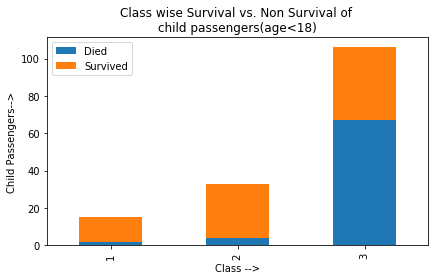

In [16]:
print('Class wise Survival vs. Non Survival of \nchild passengers(age<18)') 
print(titan_df[titan_df.child==1].groupby(['pclass', 'survived']).size())
titan_df[titan_df.child==1].groupby(['pclass','survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non Survival of \nchild passengers(age<18)')
plt.tight_layout()
plt.legend(['Died','Survived'])
plt.xlabel('Class -->')
plt.ylabel('Child Passengers-->')
plt.show()

No. of passengers class wise, gender wise
pclass  sex   
1       female    131
        male      151
2       female    103
        male      158
3       female    152
        male      349
dtype: int64


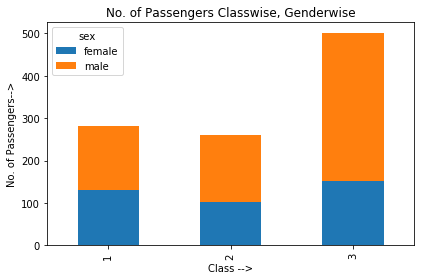

In [17]:
# No of passengers class wise, genderwise
print('No. of passengers class wise, gender wise')
print(titan_df.groupby(['pclass', 'sex']).size())
titan_df.groupby(['pclass', 'sex']).size().unstack().plot(kind='bar', stacked=True)
plt.title('No. of Passengers Classwise, Genderwise')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers-->')
plt.tight_layout()
plt.show()

Class wise Survival vs. Non-Survival
pclass  survived
1       0           103
        1           179
2       0           146
        1           115
3       0           370
        1           131
dtype: int64


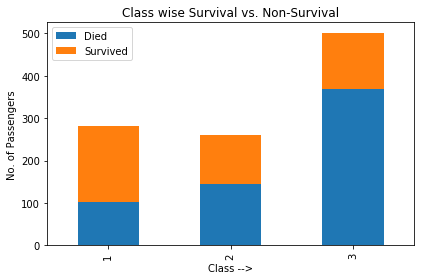

In [18]:
# Class wise survival vs. non-survival
print('Class wise Survival vs. Non-Survival')
print(titan_df.groupby(['pclass', 'survived']).size())
titan_df.groupby(['pclass', 'survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non-Survival')
plt.xlabel('Class -->')
plt.ylabel('No. of Passengers')
plt.legend(['Died', 'Survived'])
plt.tight_layout()
plt.show()

Class wise Survival vs. Non Survival of 
child passengers(age<18)
pclass  survived
1       0            2
        1           13
2       0            4
        1           29
3       0           67
        1           39
dtype: int64


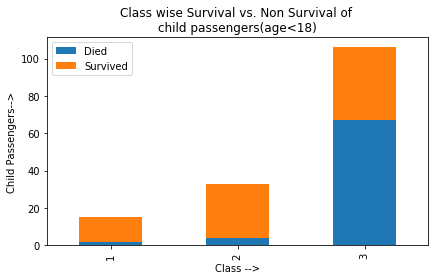

In [19]:
# Class wise Survival vs. Non-survival of child passengers( age < 18)
print('Class wise Survival vs. Non Survival of \nchild passengers(age<18)') 
print(titan_df[titan_df.child==1].groupby(['pclass', 'survived']).size())
titan_df[titan_df.child==1].groupby(['pclass','survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Class wise Survival vs. Non Survival of \nchild passengers(age<18)')
plt.tight_layout()
plt.legend(['Died','Survived'])
plt.xlabel('Class -->')
plt.ylabel('Child Passengers-->')
plt.show()

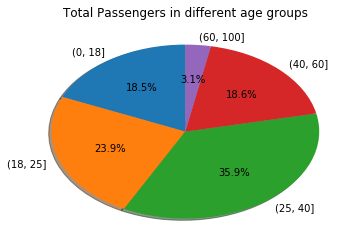

In [20]:
# Pie chart
age_bin = [0, 18, 25, 40, 60, 100]     # defined age bin intervals
# create the bins
titan_df['AgeBin'] = pd.cut(titan_df.age, bins=age_bin)
d_temp = titan_df[np.isfinite(titan_df['age'])]    # removing null rows
# Number of survivors based on age bin
survivors = d_temp.groupby('AgeBin')['survived'].agg(sum)
# Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['survived'].agg('count')
# Plot pie chart
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total Passengers in different age groups')
plt.show()

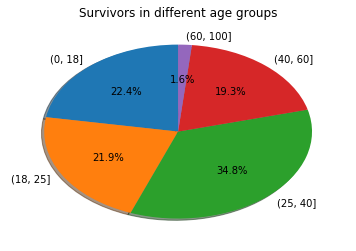

In [21]:
plt.pie(survivors, labels=survivors.index.values.tolist(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()